In [353]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [354]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'

In [355]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}

In [356]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [357]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']


In [358]:
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name[-1]
    name = name[:name.index('_stable')]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)
neu_types.head()

,neu_type,neu_name
0,A,220209_P36_N2_stable9_sA
1,C,220209_P36_N1_stable9_sC
2,D,220127_P36_N1_stable9_sD
3,C,211121_P36.5_N3_stable9_sC
4,A,211121_P36.5_N2_stable9_sA


first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']


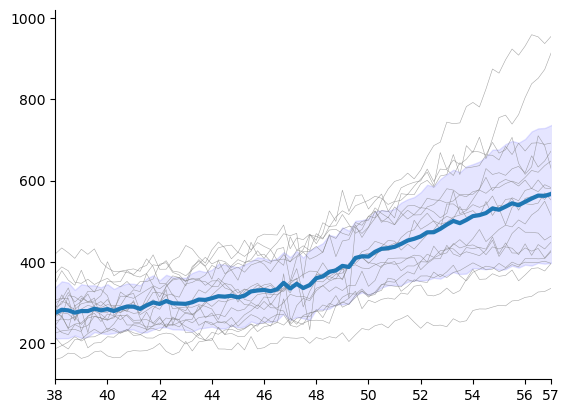

In [359]:
fig2_C = 'volume'

session_colors = {'211011':'r', '211104':'b', 
                '211107':'g', '211113': 'teal', 
                '211114':'orange', '211121':'k',
                '220209':'cyan', '220127':'violet'}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', fig2_C])
    temp_df = temp_df.rename(columns={fig2_C:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
plt.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='grey', alpha=0.7, linewidth=0.4)

# for col in results.columns[results.columns != 'timepoint']:
#     session = col.split('_')[0]
#     print(session)
#     plt.plot(results.timepoint, results[col], c=session_colors[session], alpha=0.7, linewidth=0.4)


# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

plt.plot(results.timepoint, results_mean, linewidth=3)
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
plt.fill_between(results['timepoint'], min_val, max_val, color='blue', alpha=.1)

sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

# ax.yaxis.grid(True)

plot_name = 'fig2_C_TLI_volume_allpx_overtime_Nov.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']


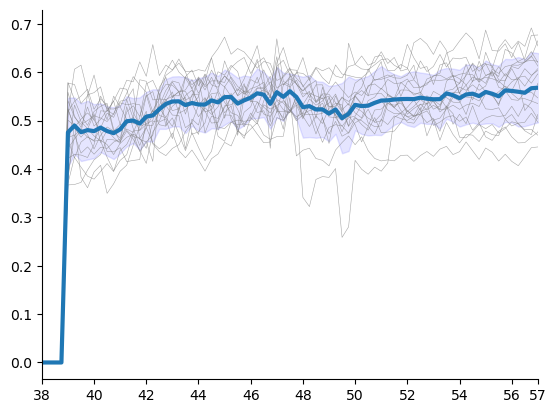

In [174]:
fig2_E = 'transient_volume_to_all'

session_colors = {'211011':'r', '211104':'b', 
                '211107':'g', '211113': 'teal', 
                '211114':'orange', '211121':'k',
                '220209':'cyan', '220127':'violet'}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', 'volume', 'trans_volume'])
    temp_df['transient_percent'] = temp_df.volume/(temp_df.volume+temp_df.trans_volume)
    del temp_df['volume']
    del temp_df['trans_volume']
    temp_df = temp_df.rename(columns={'transient_percent':neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
plt.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='grey', alpha=0.7, linewidth=0.4)

# for col in results.columns[results.columns != 'timepoint']:
#     session = col.split('_')[0]
#     print(session)
#     plt.plot(results.timepoint, results[col], c=session_colors[session], alpha=0.7, linewidth=0.4)


# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

plt.plot(results.timepoint[:], results_mean, linewidth=3)
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
plt.fill_between(results.timepoint[:], min_val, max_val, color='blue', alpha=.1)

sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

# ax.yaxis.grid(True)

plot_name = 'fig2_E_TLI_percent_transient_over_total_Nov.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')


first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']


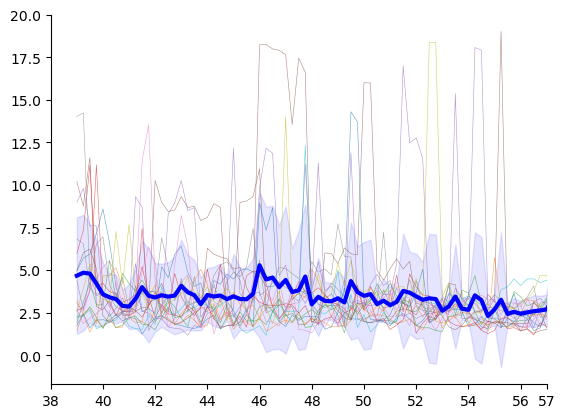

In [312]:
fig2_E = 'farthest_transient_from_stable_contour'
plot_col = 'max_trans_dist'

session_colors = {'211011':'r', '211104':'b', 
                '211107':'g', '211113': 'teal', 
                '211114':'orange', '211121':'k',
                '220209':'cyan', '220127':'violet'}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    # temp_df['transient_percent'] = temp_df.volume/( temp_df.volume+temp_df.trans_volume)
    # del temp_df['volume']
    # del temp_df['trans_volume']
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
plt.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], alpha=0.7, linewidth=0.4)

# for col in results.columns[results.columns != 'timepoint']:
#     session = col.split('_')[0]
#     plt.plot(results.timepoint, results[col], c=session_colors[session], 
#                 alpha=0.7, linewidth=0.4, label=session)
# plt.legend(bbox_to_anchor=(1.03, .95), loc=2, borderaxespad=0.)


# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

plt.plot(results.timepoint[:], results_mean, c='b', linewidth=3)
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
plt.fill_between(results.timepoint[:], min_val, max_val, color='blue', alpha=.1)

sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

# ax.yaxis.grid(True)

plot_name = 'fig2_F_TLI_transient_distance_contour_Nov.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']


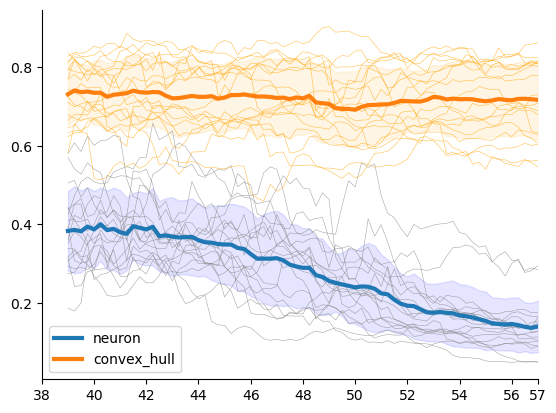

In [313]:
fig2_G = 'compactness_to_all'
plot_col = 'compactness'


session_colors = {'211011':'r', '211104':'b', 
                '211107':'g', '211113': 'teal', 
                '211114':'orange', '211121':'k',
                '220209':'cyan', '220127':'violet'}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
plt.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='grey', alpha=0.7, linewidth=0.4)

# for col in results.columns[results.columns != 'timepoint']:
#     session = col.split('_')[0]
#     print(session)
#     plt.plot(results.timepoint, results[col], c=session_colors[session], alpha=0.7, linewidth=0.4)

# for col in results.columns[results.columns != 'timepoint']:
#     subtype = col[col.index('9_s')+3]
#     session = col.split('_')[0]
#     plt.plot(results.timepoint, results[col], c=Colors[subtype], 
#                 alpha=0.7, linewidth=0.4, label=session)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

plt.plot(results.timepoint[:], results_mean, linewidth=3,  label='neuron')
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
plt.fill_between(results.timepoint[:], min_val, max_val, color='blue', alpha=.1)


# comparision of the convex_hull compactness
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', 'area', 'convex_perimeter'])
    temp_df['compactness'] = (4*np.pi*temp_df.area) / temp_df.convex_perimeter**2
    del temp_df['convex_perimeter']
    del temp_df['area']
    temp_df = temp_df.rename(columns={'compactness':neu_name})
    results = pd.merge(results, temp_df, on='timepoint')


#plotting individual neuron traces as grey faint lines
plt.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='orange', alpha=0.7, linewidth=0.4)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

plt.plot(results.timepoint[:], results_mean, linewidth=3, label='convex_hull')
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
plt.fill_between(results.timepoint[:], min_val, max_val, color='orange', alpha=.1)

sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

plt.legend()
# ax.yaxis.grid(True)

plot_name = 'fig2_G_N9_stable_neuron_compactness_comapred_convex.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']
first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']
timepoint                     57.250000
220209_P36_N2_stable9_sA       3.144558
220209_

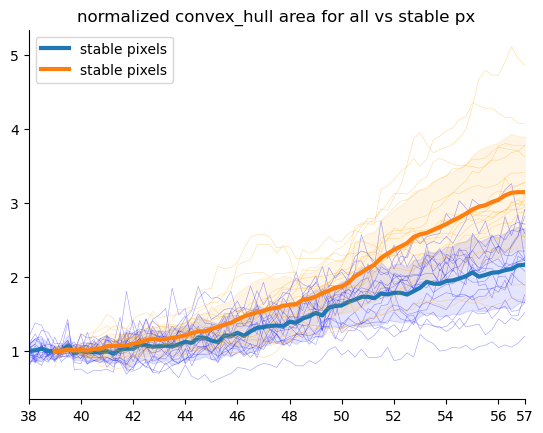

In [381]:
fig2_C = 'area'

session_colors = {'211011':'r', '211104':'b', 
                '211107':'g', '211113': 'teal', 
                '211114':'orange', '211121':'k',
                '220209':'cyan', '220127':'violet'}

# plotting settings
Colors = {'A':'b','B':'b','C':'r','D':'r'}


data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', fig2_C])
    temp_df = temp_df.rename(columns={fig2_C:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

#normalize 
results.loc[:,results.columns != 'timepoint'] = results.loc[:,results.columns != 'timepoint']/results.loc[:,results.columns != 'timepoint'].iloc[8:13].mean()
fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
ax.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='blue', alpha=0.4, linewidth=0.4)

# for col in results.columns[results.columns != 'timepoint']:
#     subtype = col[col.index('_s')+2]
#     session = col.split('_')[0]
#     plt.plot(results.timepoint, results[col], c=Colors[subtype], 
#                 alpha=0.7, linewidth=0.4, label=session)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

ax.plot(results.timepoint, results_mean, linewidth=3, label='stable pixels')
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
ax.fill_between(results['timepoint'], min_val, max_val, color='blue', alpha=.1)

sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)


data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', fig2_C])
    temp_df = temp_df.rename(columns={fig2_C:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

#normalize 
results.loc[:,results.columns != 'timepoint'] = results.loc[:,results.columns != 'timepoint']/results.loc[:,results.columns != 'timepoint'].iloc[8:13].mean()

print(results.iloc[-1])
#plotting individual neuron traces as grey faint lines
ax.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='orange', alpha=0.4, linewidth=0.4)
# Colors = {'A':'cyan','B':'cyan','C':'cyan','D':'cyan'}
# for col in results.columns[results.columns != 'timepoint']:
#     subtype = col[col.index('9_s')+3]
#     session = col.split('_')[0]
#     plt.plot(results.timepoint, results[col], c=Colors[subtype], 
#                 alpha=0.7, linewidth=0.4, label=session)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

ax.plot(results.timepoint, results_mean, linewidth=3, label='stable pixels')
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
ax.fill_between(results['timepoint'], min_val, max_val, color='orange', alpha=.1)

plt.title('normalized convex_hull area for all vs stable px')

plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

# ax.yaxis.grid(True)
plt.legend()

plot_name = 'fig2_X_TLi_AllPx_stable_convex_area_Nov.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']
220209_P36_N2_stable9_sA
220209_P36_N1_stable9_sC
220127_P36_N1_stable9_sD
211121_P36.5_N3_stable9_sC
211121_P36.5_N2_stable9_sA
211121_P36.5_N1_stable9_sA
211114_P36_N3_stable9_sC
211114_P36_N2_stable9_sA
211114_P36_N1_stable9_sA
211113_P36_N2_stable9_sA
211113_P36_N1_stable9_sC
211107_P36_N3_stable9_sD
211107_P36_N2_stable9_sC
211107_P36_N1_stable9_sB
211104_P36_N3_stable9_sC
211104_P36_N2_stable9_sA
211104_P36_N1_stable9_sC
211011_P37_N1_stable9_sB


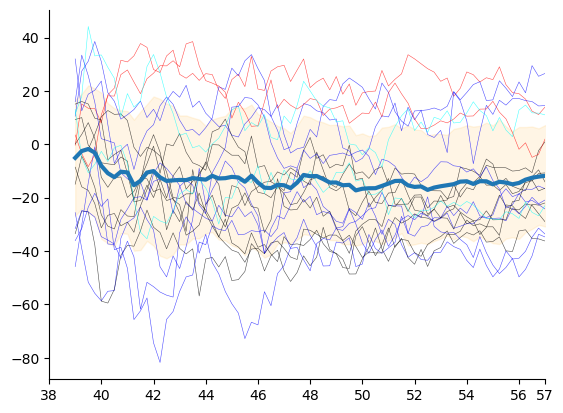

In [352]:
fig2_C = 'trans_EP_y'
fig, ax = plt.subplots(1)


sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)


data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    print(neu_name)
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', fig2_C])
    temp_df = temp_df.rename(columns={fig2_C:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

#normalize 
# results.loc[:,results.columns != 'timepoint'] = results.loc[:,results.columns != 'timepoint']/results.loc[:,results.columns != 'timepoint'].iloc[8:13].mean()

#plotting individual neuron traces as grey faint lines
# ax.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='orange', alpha=0.7, linewidth=0.4)
Colors = {'A':'b','B':'cyan','C':'k','D':'r'}
for col in results.columns[results.columns != 'timepoint']:
    subtype = col[col.index('9_s')+3]
    session = col.split('_')[0]
    plt.plot(results.timepoint, results[col], c=Colors[subtype], 
                alpha=0.7, linewidth=0.4, label=session)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

ax.plot(results.timepoint, results_mean, linewidth=3)
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
ax.fill_between(results['timepoint'], min_val, max_val, color='orange', alpha=.1)



plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

# ax.yaxis.grid(True)

plot_name = 'fig2_C_TLI_volume_allpx_overtime_Nov.pdf'
# plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']
first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']


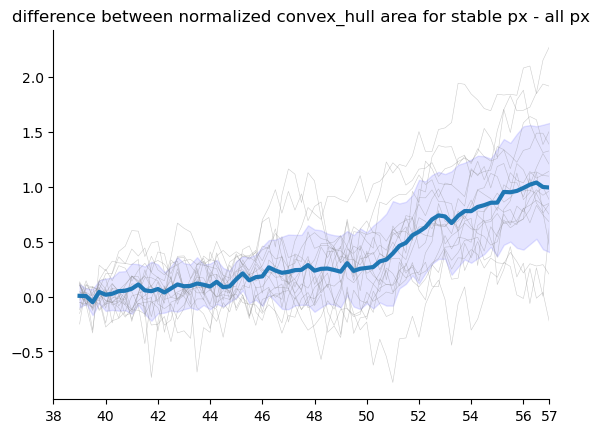

In [379]:
fig2_C = 'area'

session_colors = {'211011':'r', '211104':'b', 
                '211107':'g', '211113': 'teal', 
                '211114':'orange', '211121':'k',
                '220209':'cyan', '220127':'violet'}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
allpx_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

stable_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
stab_files = datautils.get_file_names(stable_path, group_by='_', order=True, nested_files=False, criteria='.csv')

save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'



timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
compare = []
for ind, file in enumerate(allpx_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', fig2_C])
    stab_file = [f for f in stab_files if neu_name[:-3] in f][0]
    temp_df2 = pd.read_csv(stab_file, sep=',', usecols = ['timepoint', fig2_C])
    temp_df.loc[:,fig2_C] = temp_df.loc[:,fig2_C]/temp_df.loc[:,fig2_C].iloc[8:12].mean()
    temp_df2.loc[:,fig2_C] = temp_df2.loc[:,fig2_C]/temp_df2.loc[:,fig2_C].iloc[8:12].mean()

    compare.append((neu_name, temp_df.iloc[80][fig2_C], temp_df2.iloc[80][fig2_C]))

    temp_df.loc[:,fig2_C] = temp_df2.loc[:,fig2_C] - temp_df.loc[:,fig2_C] 
    # temp_df.loc[:,fig2_C] = temp_df.loc[:,fig2_C]/temp_df.loc[:,fig2_C].iloc[8:12].mean()
    temp_df = temp_df.rename(columns={fig2_C:neu_name})
    # temp_df = temp_df2.rename(columns={fig2_C:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

#normalize 
# results.loc[:,results.columns != 'timepoint'] = results.loc[:,results.columns != 'timepoint']/results.loc[:,results.columns != 'timepoint'].iloc[0]
# print(results.iloc[-1])
fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
ax.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='grey', alpha=0.4, linewidth=0.4)
# for col in results.columns[results.columns != 'timepoint']:
#     subtype = col[col.index('_s')+2]
#     session = col.split('_')[0]
#     plt.plot(results.timepoint, results[col], c=Colors[subtype], 
#                 alpha=0.7, linewidth=0.4, label=session)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

ax.plot(results.timepoint, results_mean, linewidth=3)
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
ax.fill_between(results['timepoint'], min_val, max_val, color='blue', alpha=.1)

sns.despine()


plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)

plt.title('difference between normalized convex_hull area for stable px - all px')
plot_name = 'fig2_XX_TLI_difference_stable_area-all_area.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')


In [417]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

numpy.set_printoptions(threshold=sys.maxsize)

NameError: name 'numpy' is not defined

In [418]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
plot_cols = ['timepoint','PC1_angle','PC1_x', 'PC1_y']
Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
allpx_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

stable_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
stab_files = datautils.get_file_names(stable_path, group_by='_', order=True, nested_files=False, criteria='.csv')

save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'




timepoints = {'timepoint':np.arange(36,58,0.25)}
# results = pd.DataFrame(timepoints)
# results_stable = pd.DataFrame(timepoints)
result_columns=['neuron','subtype','PC1_angle','PC1_x','PC1_y']
results = pd.DataFrame(columns=result_columns)
results_stable = pd.DataFrame(columns=result_columns)

for ind, file in enumerate(allpx_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    print(neu_name)
    temp_df = pd.read_csv(file, sep=',', usecols = plot_cols).iloc[80]
    stab_file = [f for f in stab_files if neu_name[:-3] in f][0]
    print(stab_file)
    temp_df2 = pd.read_csv(stab_file, sep=',', usecols = plot_cols).iloc[80]



# #reading the specified column from D=',', usecols = ['timepoint', plot_col])
#     stab_file = [f for f in stab_files if neu_name[:-3] in f][0]
#     temp_df2 = pd.read_csv(stab_file, sep=',', usecols = ['timepoint', plot_col])
#     # temp_df.loc[:,fig2_C] = temp_df.loc[:,fig2_C]/temp_df.loc[:,fig2_C].iloc[8:12].mean()
#     # temp_df2.loc[:,fig2_C] = temp_df2.loc[:,fig2_C]/temp_df2.loc[:,fig2_C].iloc[8:12].mean()

#     temp_df = temp_df.rename(columns={plot_col:neu_name})
#     temp_df2 = temp_df2.rename(columns={plot_col:neu_name})
#     results = pd.merge(results, temp_df, on='timepoint')
#     results_stable = pd.merge(results, temp_df2, on='timepoint')

# stable_PC1_angle = pd.DataFrame({'neuron':results_stable.iloc[80].index[1:],
#                                 'subtype': [s[s.index('_s')+2] for s in results_stable.iloc[80].index[1:]],
#                                 plot_col:results_stable.iloc[80][1:]})

# all_PC1_angle = pd.DataFrame({'neuron':results.iloc[80].index[1:],
#                                 'subtype': [s[s.index('_s')+2] for s in results.iloc[80].index[1:]],
#                                 plot_col:results.iloc[80][1:]})

# plt.figure(figsize=(8,8))
# ax = plt.subplot(111, projection = 'polar')

# for i, neu in all_PC1_angle.iterrows():
#     rad = math.radians(neu[plot_col])
#     dist = 1
#     c = Colors[neu.subtype]
#     ax.scatter(rad,dist, color=c)
# ax.grid(True)

# # plot_name = 'PC1_angle'+'_in_adult_T4_dendrites.pdf'
# # plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']
first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']
220209_P36_N2_sA
/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/2202

In [421]:
temp_df = temp_df[1:]

PC1_angle    202.115560
PC1_x        -37.588233
PC1_y        -15.274891
Name: 80, dtype: float64

In [423]:
temp_df['neuron'] 
temp_df['subtype'] 
neu_name

'211011_P37_N1_sB'

In [422]:
results

,neuron,subtype,PC1_angle,PC1_x,PC1_y


first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']
first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N2_stable9_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220209_P36_N1_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/220127_P36_N1_stable9_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N3_stable9_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/211121_P36.5_N2_stable9_sA.csv']


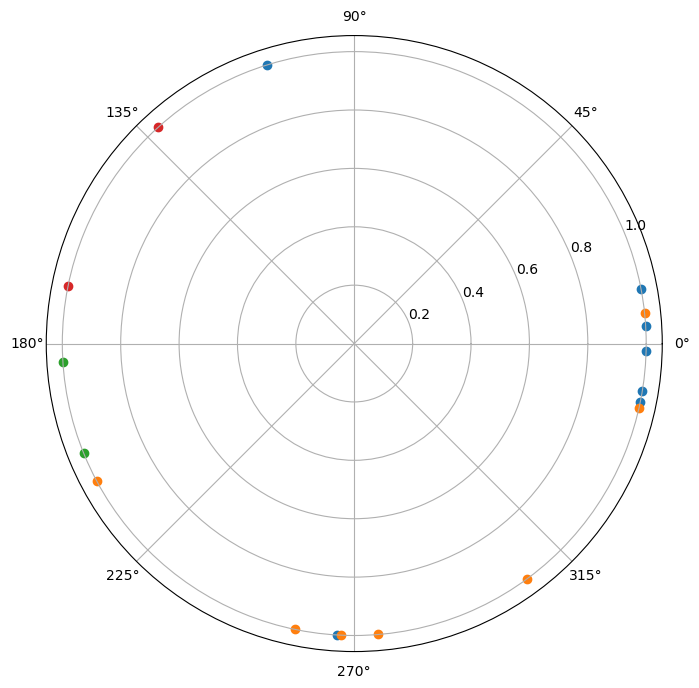

In [412]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
plot_col = 'PC1_angle'
Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
allpx_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

stable_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/'
stab_files = datautils.get_file_names(stable_path, group_by='_', order=True, nested_files=False, criteria='.csv')

save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/stable_9_Nov/figs/fig2/'




timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
results_stable = pd.DataFrame(timepoints)

#reading the specified column from each output file, and adding it to collective_results
for ind, file in enumerate(allpx_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    stab_file = [f for f in stab_files if neu_name[:-3] in f][0]
    temp_df2 = pd.read_csv(stab_file, sep=',', usecols = ['timepoint', plot_col])
    # temp_df.loc[:,fig2_C] = temp_df.loc[:,fig2_C]/temp_df.loc[:,fig2_C].iloc[8:12].mean()
    # temp_df2.loc[:,fig2_C] = temp_df2.loc[:,fig2_C]/temp_df2.loc[:,fig2_C].iloc[8:12].mean()

    temp_df = temp_df.rename(columns={plot_col:neu_name})
    temp_df2 = temp_df2.rename(columns={plot_col:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')
    results_stable = pd.merge(results, temp_df2, on='timepoint')

stable_PC1_angle = pd.DataFrame({'neuron':results_stable.iloc[80].index[1:],
                                'subtype': [s[s.index('_s')+2] for s in results_stable.iloc[80].index[1:]],
                                plot_col:results_stable.iloc[80][1:]})

all_PC1_angle = pd.DataFrame({'neuron':results.iloc[80].index[1:],
                                'subtype': [s[s.index('_s')+2] for s in results.iloc[80].index[1:]],
                                plot_col:results.iloc[80][1:]})

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')

for i, neu in all_PC1_angle.iterrows():
    rad = math.radians(neu[plot_col])
    dist = 1
    c = Colors[neu.subtype]
    ax.scatter(rad,dist, color=c)
ax.grid(True)

# plot_name = 'PC1_angle'+'_in_adult_T4_dendrites.pdf'
# plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [ ]:
PC1_x

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')

for i, neu in results_df.iterrows():
    rad = math.radians(neu.PC1_angle)
    dist = np.linalg.norm((neu.PC1_x,neu.PC1_y))*0.076
    c = Colors[neu.subtype]
    ax.scatter(rad,dist, color=c)
ax.grid(True)

plot_name = 'PC1_angle'+'_in_adult_T4_dendrites.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [281]:
compare

[('220209_P36_N2_sA', 2.0248588456712673, 3.2043050658749306),
 ('220209_P36_N1_sC', 2.61117494972709, 3.1623266001460206),
 ('220127_P36_N1_sD', 3.100235057085292, 2.5489768076398365),
 ('211121_P36.5_N3_sC', 2.115306810519218, 2.9565217391304346),
 ('211121_P36.5_N2_sA', 2.2847748106815464, 3.6959684123025767),
 ('211121_P36.5_N1_sA', 2.130920597251063, 2.8227934875749785),
 ('211114_P36_N3_sC', 1.87553562531141, 2.567449481157837),
 ('211114_P36_N2_sA', 2.182999806962229, 4.770981991165478),
 ('211114_P36_N1_sA', 3.0243744432747595, 3.0680029695619897),
 ('211113_P36_N2_sA', 2.624944121591417, 3.7888030081470645),
 ('211113_P36_N1_sC', 2.7886065899166335, 3.429195804195804),
 ('211107_P36_N3_sD', 1.3873042215537807, 1.6491712707182322),
 ('211107_P36_N2_sC', 2.3120912292470237, 3.163575667655786),
 ('211107_P36_N1_sB', 1.2613032351204145, 1.8397812713602186),
 ('211104_P36_N3_sC', 2.700011937447774, 4.1316275389079395),
 ('211104_P36_N2_sA', 1.7838454641780097, 4.6530825496342745),


In [282]:
[(el[0],el[2]-el[1]) for el in compare]

[('220209_P36_N2_sA', 1.1794462202036633),
 ('220209_P36_N1_sC', 0.5511516504189307),
 ('220127_P36_N1_sD', -0.5512582494454557),
 ('211121_P36.5_N3_sC', 0.8412149286112167),
 ('211121_P36.5_N2_sA', 1.4111936016210302),
 ('211121_P36.5_N1_sA', 0.6918728903239155),
 ('211114_P36_N3_sC', 0.6919138558464271),
 ('211114_P36_N2_sA', 2.5879821842032484),
 ('211114_P36_N1_sA', 0.04362852628723024),
 ('211113_P36_N2_sA', 1.1638588865556474),
 ('211113_P36_N1_sC', 0.6405892142791707),
 ('211107_P36_N3_sD', 0.26186704916445147),
 ('211107_P36_N2_sC', 0.8514844384087623),
 ('211107_P36_N1_sB', 0.5784780362398041),
 ('211104_P36_N3_sC', 1.4316156014601655),
 ('211104_P36_N2_sA', 2.8692370854562648),
 ('211104_P36_N1_sC', 1.3683943492516795),
 ('211011_P37_N1_sB', 1.3309301310649806)]

In [53]:
results_mean = results.loc[:,results.columns != 'timepoints'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoints'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

In [86]:
results.columns[results.columns != 'timepoint']

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<ipython-input-85-e2496ed02af9>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


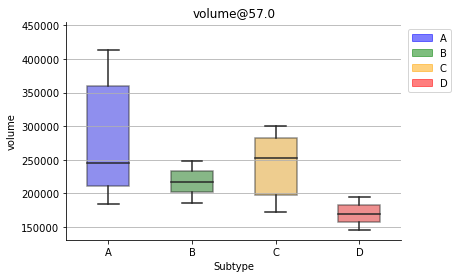

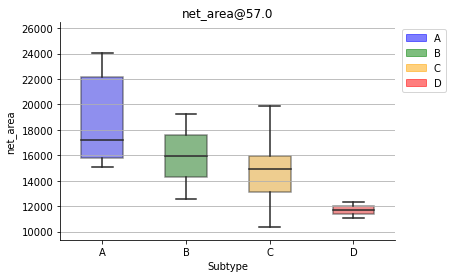

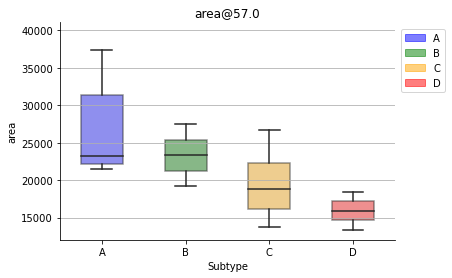

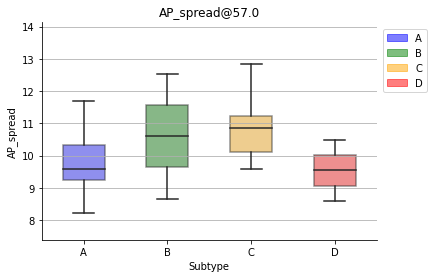

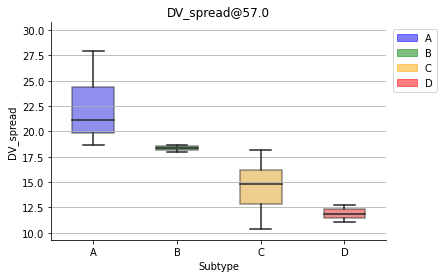

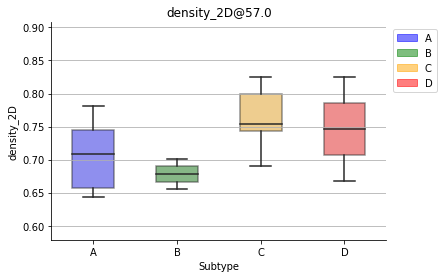

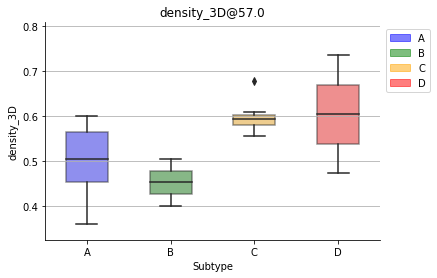

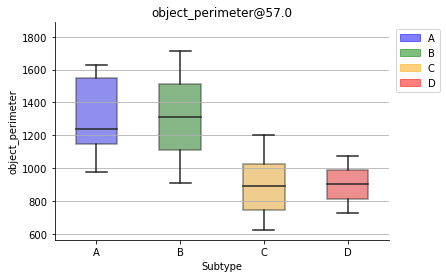

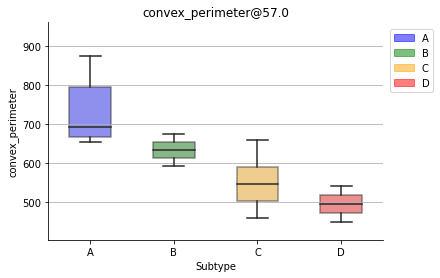

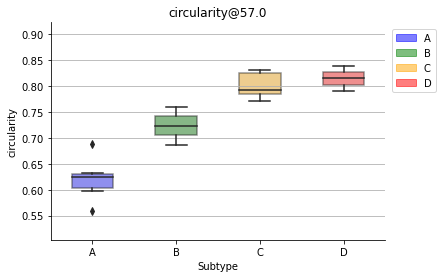

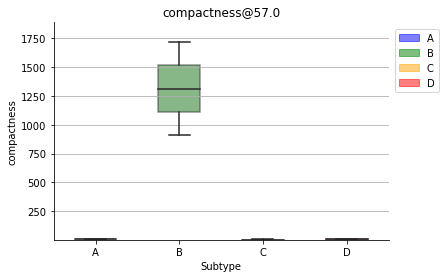

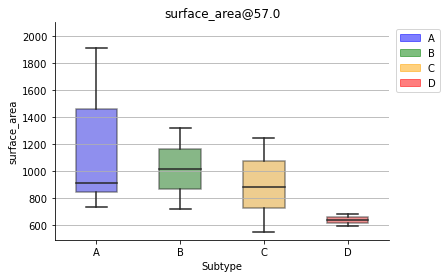

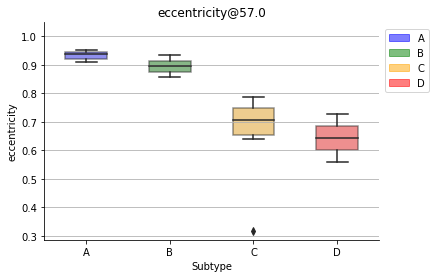

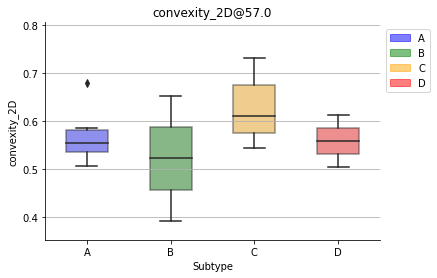

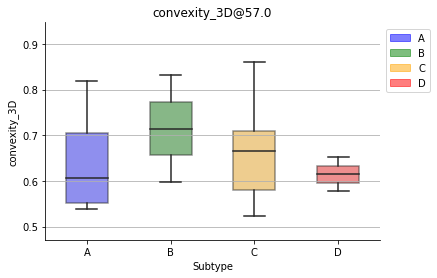

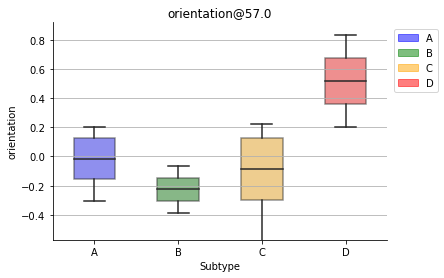

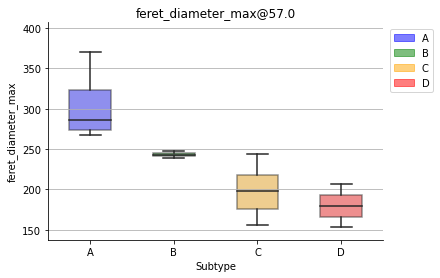

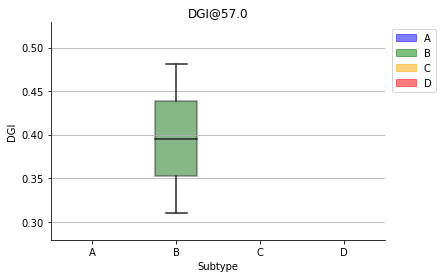

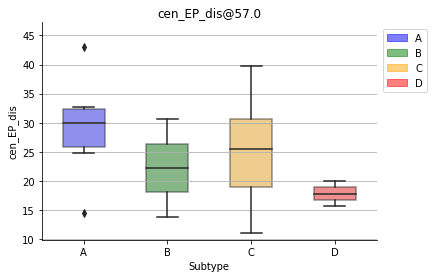

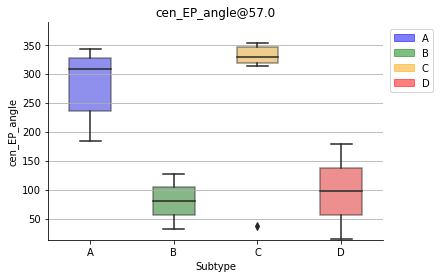

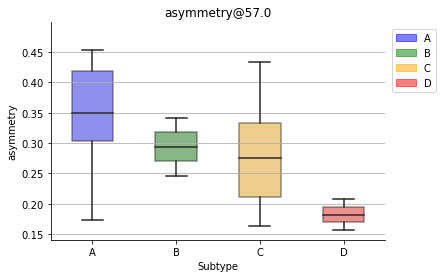

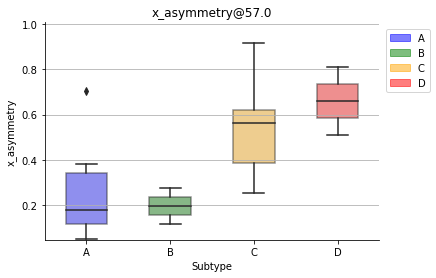

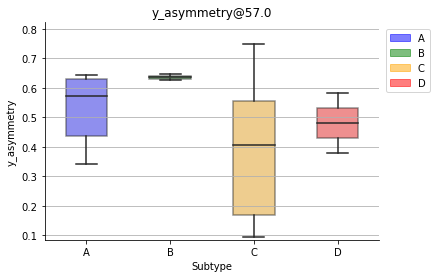

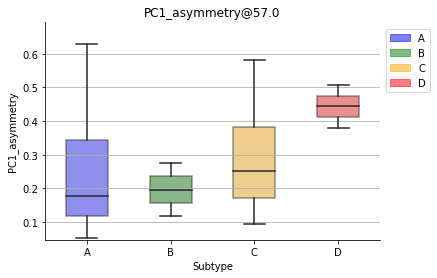

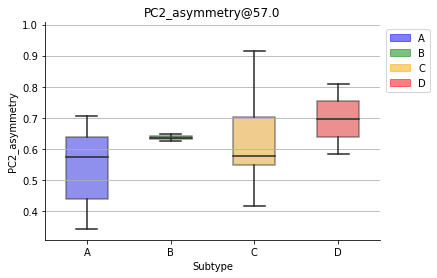

In [85]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_cols:0 ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]
    del collective_results
    neu_names = list(y_vals.keys()[1:])
    neu_types = [neu.split('_s')[1][0] for neu in neu_names]
    val_col_name = plot_col+'@'+str(y_vals['timepoint'])
    plot_df = {'neu_name':neu_names, 'subtype':neu_types, 
                val_col_name:y_vals[1:]}
    plot_df = pd.DataFrame(plot_df)
    # plot_df.index = range(len(neu_names))
    fig, ax = plt.subplots(1)
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=plot_df.subtype, y=plot_df[val_col_name], 
                order=plt_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)
    ax.set_title(val_col_name)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = val_col_name+'hAPF.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)


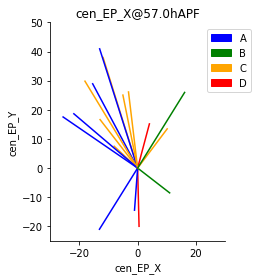

In [152]:
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results_X = pd.DataFrame(timepoints)
    collective_results_Y = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[0]])
        temp_df = temp_df.rename(columns={plot_col[0]:neu_name})
        collective_results_X = pd.merge(collective_results_X, temp_df, on='timepoint')
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results_Y = pd.merge(collective_results_Y, temp_df, on='timepoint')
    x_vals = collective_results_X.loc[Plot_t]
    y_vals = collective_results_Y.loc[Plot_t]
    del collective_results_X, collective_results_Y

    x_col_name = plot_col[0]+'@'+str(y_vals['timepoint'])
    y_col_name = plot_col[1]+'@'+str(y_vals['timepoint'])
    x_vals = x_vals.apply(lambda x: (0, x))
    y_vals = y_vals.apply(lambda y: (0, y))

    neu_names = list(y_vals.keys()[1:])
    neu_types = [neu.split('_s')[1][0] for neu in neu_names]

    plot_df = {'neu_name':neu_names, 'subtype':neu_types, 
                x_col_name:x_vals[1:], y_col_name:y_vals[1:]}
    plot_df = pd.DataFrame(plot_df)
    fig, ax = plt.subplots(1)
    for index, row in plot_df.iterrows():
        ax.plot(row['cen_EP_X@57.0'],row['cen_EP_Y@57.0'], c=Colors[row.subtype])

    ax.set_ylim(-25,50)
    ax.set_xlim(-30,30)

    ax.set_title(x_col_name+'hAPF')
    ax.set_xlabel(plot_col[0])
    ax.set_ylabel(plot_col[1])
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = x_col_name+'hAPF.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [144]:
Colors

{'A': 'b', 'B': 'g', 'C': 'orange', 'D': 'r'}

In [141]:
row

neu_name              220209_P36_N1_sC.cs
subtype                                 C
cen_EP_X@57.0    (0, -3.1347602970965625)
cen_EP_Y@57.0      (0, 26.12610398379473)
Name: 220209_P36_N1_sC.cs, dtype: object

In [94]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]

In [95]:
y_vals

timepoint                57.000000
220209_P36_N1_sC.cs       0.561442
220127_P36_N1_sD.cs       0.581982
211121_P36.5_N3_sC.cs     0.577430
211121_P36.5_N2_sA.cs     0.643399
211121_P36.5_N1_sA.cs     0.704988
211114_P36_N3_sC.cs       0.417709
211114_P36_N2_sA.cs       0.408015
211114_P36_N1_sA.cs       0.341624
211113_P36_N2_sA.cs       0.526159
211113_P36_N1_sC.cs       0.661404
211107_P36_N3_sD.cs       0.809551
211107_P36_N2_sC.cs       0.746825
211107_P36_N1_sB.cs       0.624724
211104_P36_N3_sC.cs       0.533741
211104_P36_N2_sA.cs       0.621363
211104_P36_N1_sC.cs       0.915525
211011_P37_N1_sB.cs       0.647066
Name: 80, dtype: float64

In [ ]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

In [35]:
collective_results.head()

,timepoint,220209_P36_N1_sC.cs,220127_P36_N1_sD.cs,211121_P36.5_N3_sC.cs,211121_P36.5_N2_sA.cs,211121_P36.5_N1_sA.cs,211114_P36_N3_sC.cs,211114_P36_N2_sA.cs,211114_P36_N1_sA.cs,211113_P36_N2_sA.cs,211113_P36_N1_sC.cs,211107_P36_N3_sD.cs,211107_P36_N2_sC.cs,211107_P36_N1_sB.cs,211104_P36_N3_sC.cs,211104_P36_N2_sA.cs,211104_P36_N1_sC.cs,211011_P37_N1_sB.cs
0,37.00,78916,73491,116952,130529,95313,107071,151469,149726,127665,110070,132449,70942,181889,76014,101286,136287,131661
1,37.25,83982,66185,112677,115766,96316,94970,145275,152121,119660,116364,128381,76129,203675,114303,140596,172504,152362
2,37.50,93741,72354,117705,127215,102673,99258,132612,152172,116568,116620,125947,78334,195900,102836,135014,164678,149077
3,37.75,88093,76553,120615,126959,91071,98647,131295,158076,112778,107532,135505,87855,191800,116692,133455,156393,165857
4,38.00,80822,69393,114979,118545,97465,105399,129527,122889,110119,104940,124646,92852,181558,120719,132940,150424,160854


In [74]:

plot_df.head()

,neu_name,subtype,volume@57.0
0,220209_P36_N1_sC.cs,C,222150.0
1,220127_P36_N1_sD.cs,D,145196.0
2,211121_P36.5_N3_sC.cs,C,252156.0
3,211121_P36.5_N2_sA.cs,A,238911.0
4,211121_P36.5_N1_sA.cs,A,184278.0


<AxesSubplot:xlabel='subtype', ylabel='volume@57.0'>

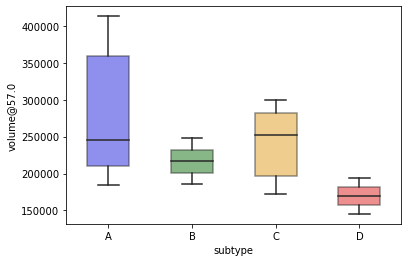

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)
    

In [ ]:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [5]:
results_df = pd.read_csv(data_path, index_col=0)

In [6]:
results_df.head()

,neuron,subtype,entry_point,volume,net_area,area,AP_spread,DV_spread,density_2D,density_3D,...,yP_scale,yP_angle,yP_xy,yN_weight,yN_scale,yN_angle,yN_xy,PCA_angle,PCA_xy,PCA_shift_centroid
0,T4-02,A,[ 11 347 337],108849,14980,27964,146,267,0.535689,0.363586,...,146.971715,-99.687679,"(-0.0964996688972741, 0.5652782239136788)",0.003842,-112.013844,-279.687679,"(0.07241650660220049, -0.4242032610257114)",-9.687679,"(39.34590188342817, 6.716810136304233)","(4.393954512209415, 21.89753021929927)"
1,T4-03,D,[ 22 651 367],108692,17030,38753,159,336,0.439450,0.219961,...,91.193838,-86.747302,"(0.5951072459657829, 10.471458819771144)",0.526327,-246.534458,-266.747302,"(-7.3624309385526585, -129.54873749074792)",-266.747302,"(-7.3624309385526585, -129.54873749074792)","(-83.91317987304318, -6.3473051991717675)"
2,T4-04,B,[ 18 569 625],186473,21180,43348,167,352,0.488604,0.289973,...,146.007427,-91.955341,"(-0.28542086865273697, 8.360211519175595)",0.074719,-205.685251,-271.955341,"(0.5243854677985635, -15.35968077271772)",-181.955341,"(-104.21433415715065, -3.557917848486889)","(-16.921708624837933, -47.9081530700065)"
3,T4-05,D,[ 10 666 452],170394,22127,51284,207,367,0.431460,0.215020,...,95.363716,-81.309100,"(1.613308582059392, 10.554229281046819)",0.549541,-282.230528,-261.309100,"(-23.435768901607982, -153.31628500324416)",-261.309100,"(-23.435768901607982, -153.31628500324416)","(-97.30143836713606, -15.992372805863232)"
4,T4-06,D,[ 15 441 368],168232,20893,43249,155,367,0.483086,0.240248,...,106.038768,-80.571119,"(2.1034614700853624, 12.66635343034258)",0.467388,-259.251018,-260.571119,"(-19.850616474093734, -119.53388623792972)",-260.571119,"(-19.850616474093734, -119.53388623792972)","(-82.37215767197284, 0.870859272895592)"


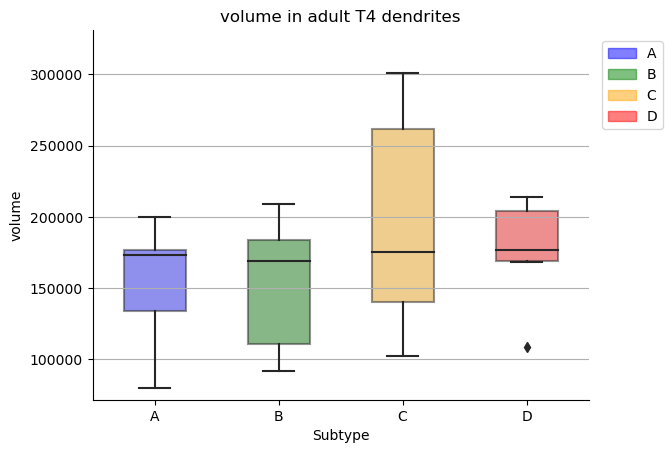

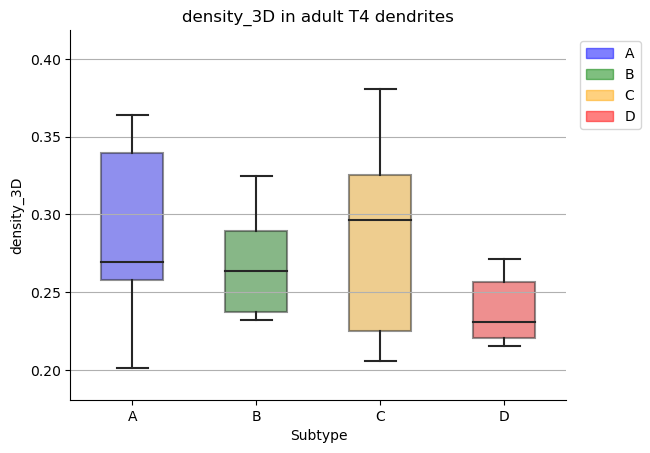

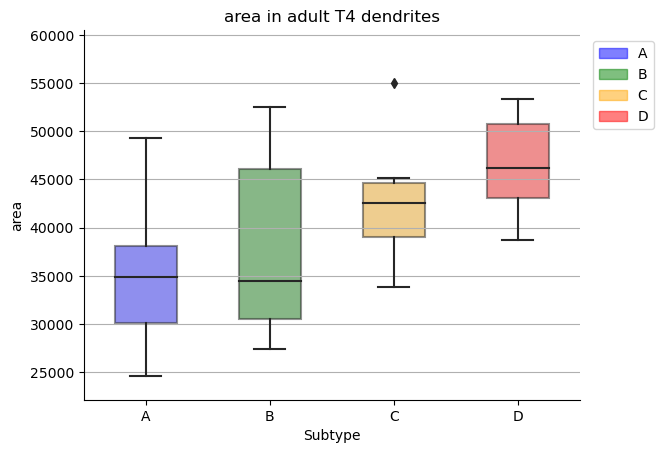

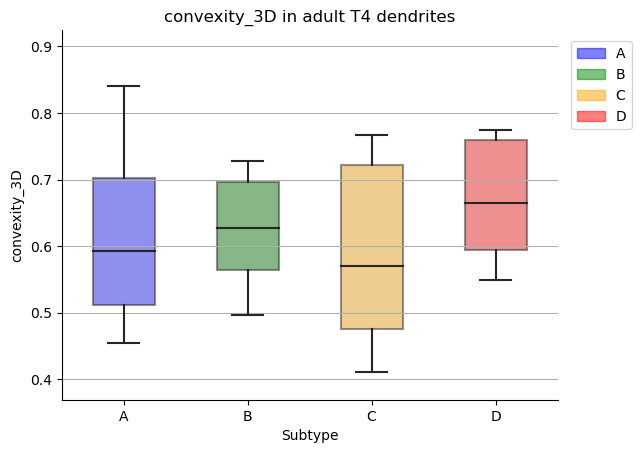

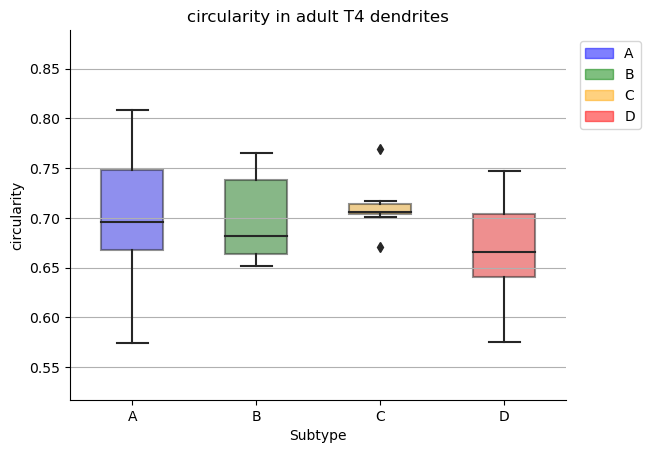

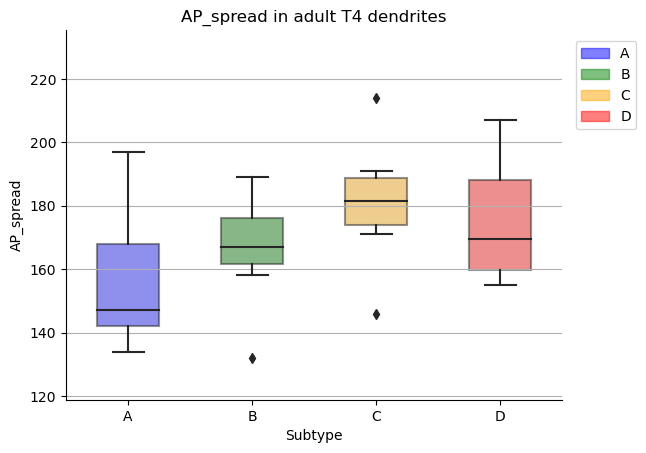

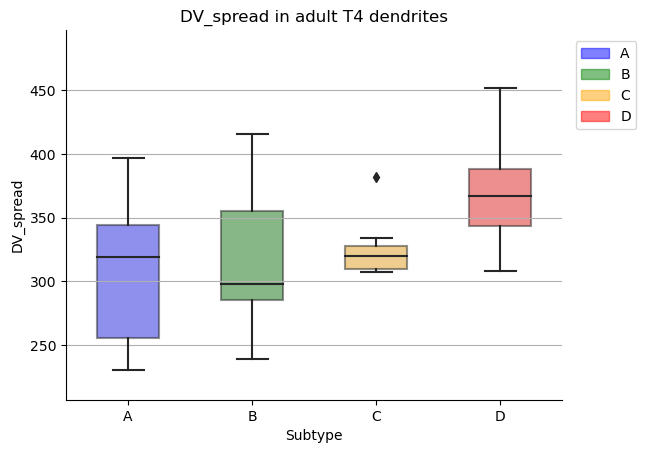

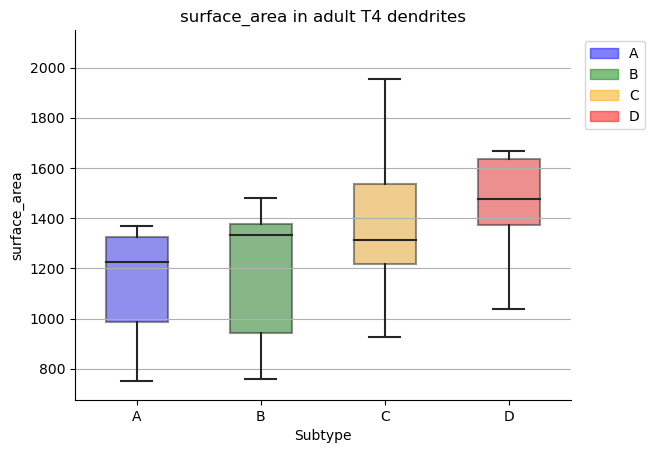

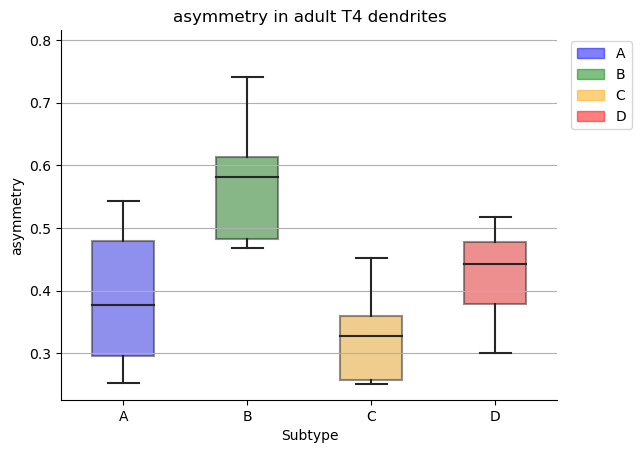

In [7]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

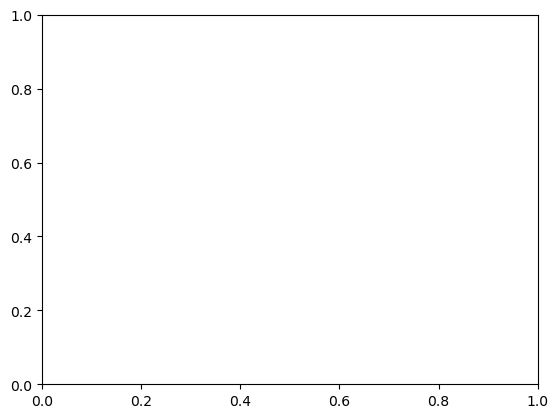

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

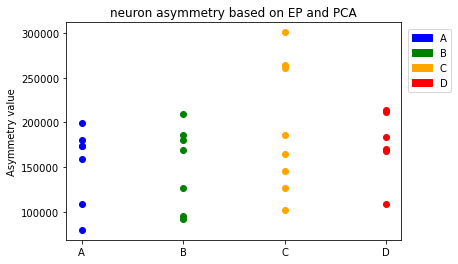

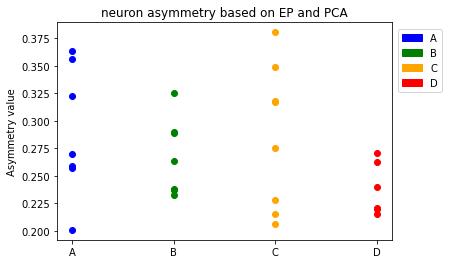

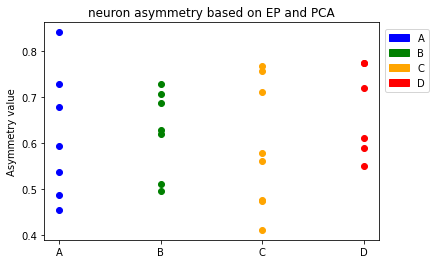

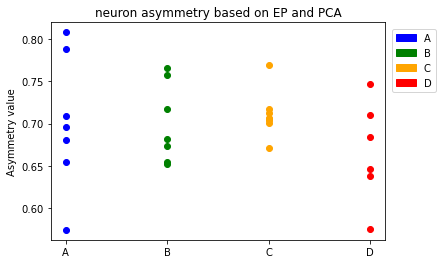

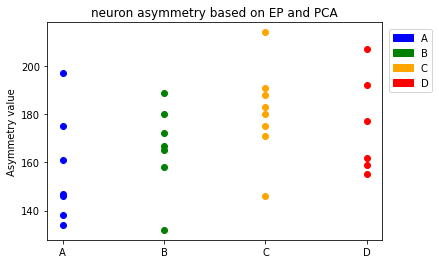

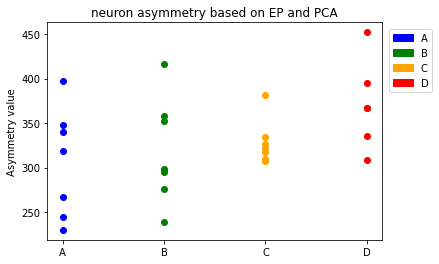

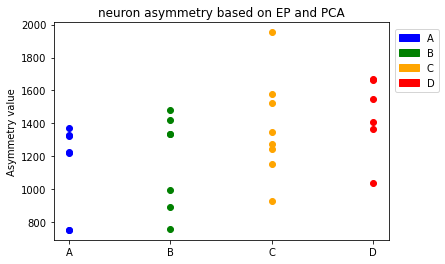

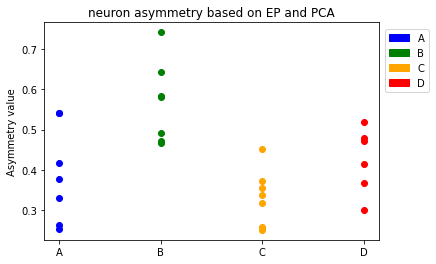

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


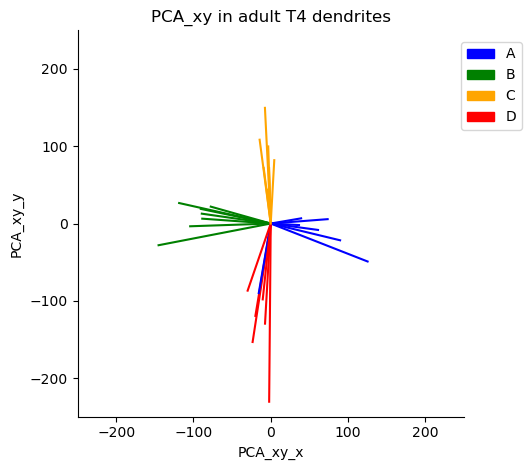

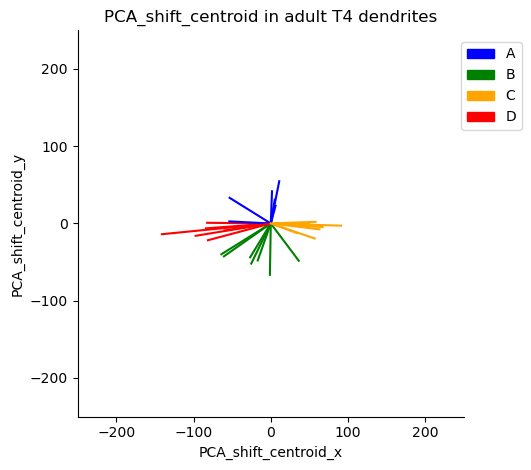

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)